# CODING QUESTIONS FOR HOMEWORK 3

### 1. c. Plot X vs Y in Scatter plot from data in Table 1 and comment on the relation of X vs Y using Covariance,Corelation. Please comment on Covariance and corelation values [5 Pts]

Covariance matrix::: 
             X             Y
X    6.545455    226.363636
Y  226.363636  10252.265152

Correlation matrix::: 
          X        Y
X  1.00000  0.87383
Y  0.87383  1.00000


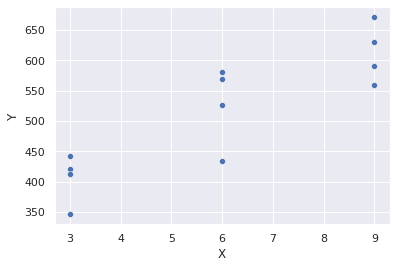

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Loading the csv file data
df = pd.read_csv('DM_Homework3.csv')

# Scatter plot matrix
ax = sns.scatterplot(x="X", y="Y", data=df)

print("Covariance matrix::: \n", df.cov())
print("\nCorrelation matrix::: \n", df.corr())


Covariance ranges from minus infinity to infinity. Covariance of X and Y is 226.36. Correlation of X and Y is 0.87 which is almost near to 1, this implies there is positive linear correlation between X and Y.

This is also confirmed by a linearly increasing trend in the data points shown in the scatter plot.

### d) Perform Linear regression on the following data using Python? and print β0, β1 values in equation y= β0+ β1*x. Please write down what is your understanding from those values. [10 Pts]

In [3]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Reshaping the data X & Y data as it contains single sample
X = df['X'].values.reshape(-1,1)
Y = df['Y'].values.reshape(-1,1)

linearRegression = LinearRegression()  
df_lr = linearRegression.fit(X, Y) #training the algorithm

#To retrieve the intercept:
print("Intercept = ", linearRegression.intercept_)

#For retrieving the slope:
print("Coeeficient b1 or Sploe of Equation = ", linearRegression.coef_)

Intercept =  [307.91666667]
Coeeficient b1 or Sploe of Equation =  [[34.58333333]]


Linear Regression equation y = 307.91 + 34.58x. Slope of the linear equation is 34.58. B0 value is 307.91.

### e) What are different evaluation metrics available for predicting the performance of the Linear Regression? Evaluate all those methods on the given dataset in Table 1 and also please print out the accuracy, R2, Adjusted R2 [10 pts]

For evaluating the performance of the Linear Regression we can use Mean Squared Error (MSE), R squared and Adjusted R squared.

In [6]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

model = sm.OLS(Y,X)

ols = sm.OLS(Y, X)
lr = ols.fit()
print("P Values::: \n",lr.pvalues)
print("T Values:::\n",lr.tvalues)
print("R Squared:::\n",lr.rsquared)
print("Adjusted R Squared:::\n",lr.rsquared_adj)

P Values::: 
 [3.57239349e-08]
T Values:::
 [13.44985176]
R Squared:::
 0.9426780340306771
Adjusted R Squared:::
 0.937466946215284


# f) Print ANOVA (Analysis of Variance) table and Parameter Estimates for the given data and explain your understanding. [10 pts]

In [7]:
print("ANOVA(Analysis of Variance Table:::)\n",lr.summary())

ANOVA(Analysis of Variance Table:::)
                                  OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.937
Method:                 Least Squares   F-statistic:                              180.9
Date:                Sat, 24 Oct 2020   Prob (F-statistic):                    3.57e-08
Time:                        16:55:20   Log-Likelihood:                         -75.021
No. Observations:                  12   AIC:                                      152.0
Df Residuals:                      11   BIC:                                      152.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
---

/home/shoebhabeeb/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


R-squared value is 0.943 and Adjusted R-squared value is 0.937. Standard error is 5.842. Coefficient of x1 is 78.5714.

### Q2. d. Perfom Naive Bayes algorithm on the below dataset in python in which you can classify wheather a Red Domestic SUV is stolen or not as shown in 2.2. [10 pts]

In [9]:
from sklearn import preprocessing

# Loading the csv file data
df = pd.read_csv('Data_Set_Q2.csv')
df

,Example No.,Color,Type,Origin,Stolen?
0,1,Red,Sports,Domestic,Yes
1,2,Red,Sports,Domestic,No
2,3,Red,Sports,Domestic,Yes
3,4,Yellow,Sports,Domestic,No
4,5,Yellow,Sports,Imported,Yes
5,6,Yellow,SUV,Imported,No
6,7,Yellow,SUV,Imported,Yes
7,8,Yellow,SUV,Domestic,No
8,9,Red,SUV,Imported,No
9,10,Red,Sports,Imported,Yes


In [14]:
#creating labelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
color_encoded=le.fit_transform(df['Color'])
print("Color:\n", color_encoded)

type_encoded=le.fit_transform(df['Type'])
print("Type Encoded: \n", type_encoded)

origin_encoded=le.fit_transform(df['Origin'])
print("Origin:\n", origin_encoded)

stolen_encoded=le.fit_transform(df['Stolen?']) # target
print("Stolen:\n", stolen_encoded)

label=le.fit_transform(stolen_encoded)

#Combinig descriptive features into single listof tuples
features = pd.DataFrame(zip(color_encoded,type_encoded,origin_encoded))
print(features)

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets
model.fit(features,label)

#Predict Output
predicted= model.predict([[0,0,0]]) # RED SUV Domestic
print("Predicted Value:", predicted)

Color:
 [0 0 0 1 1 1 1 1 0 0]
Type Encoded: 
 [1 1 1 1 1 0 0 0 0 1]
Origin:
 [0 0 0 0 1 1 1 0 1 1]
Stolen:
 [1 0 1 0 1 0 1 0 0 1]
   0  1  2
0  0  1  0
1  0  1  0
2  0  1  0
3  1  1  0
4  1  1  1
5  1  0  1
6  1  0  1
7  1  0  0
8  0  0  1
9  0  1  1
Predicted Value: [0]


Predicted Value is NO for stolen class

# THANK YOU